In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

data_df = pd.read_csv(data_path,index_col=0)

data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#feature matrix
X= data_df[['TV','radio','newspaper']].values
X=np.c_[np.ones((X.shape[0],1)),X]

y=data_df['sales'].values.reshape(-1,1)

n = X.shape[0] #no of samples (rows)
d = X.shape[1] # no of features (columns)

In [5]:
def initialize_betas(X,y):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initialize_betas(X,y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


In [6]:
def calculate_cost(betas):
    cost = 1/2 * np.sum(np.square(np.dot(X,betas)-y))
    return cost

print("Cost with random betas:", calculate_cost(betas))

Cost with random betas: 2303714.226243876


In [7]:
def calculate_gradients(betas):
    gradients = np.dot(X.T,(np.dot(X,betas)-y))
    return gradients

print('Gradients for random betas = \n', calculate_gradients(betas))

Gradients for random betas = 
 [[  27563.85598559]
 [4631129.37253468]
 [ 731917.2683292 ]
 [1079270.65268036]]


In [14]:
def gradient_descent(X, y, alpha=0.003 , max_iters=10000, precision = 1e-3):
  iteration = 0 
  difference = 1
  betas = initialize_betas(X,y) 
  cost = calculate_cost(betas) 
  costs = [calculate_cost(betas)] 

  while difference > precision and iteration <= max_iters :
    betas = betas - alpha * calculate_gradients(betas)

    cost = calculate_cost(betas)

    difference = np.abs(costs[iteration] - cost) 
    costs.append(cost)
    
    print("iteration: {}, cost: {}".format(iteration, cost))
    iteration += 1
    
    if(cost == np.infty):
      print("Cost reached infinity, try smaller learning rate")
      break
    
  return betas, iteration, costs

In [15]:
betas, steps, costs = gradient_descent(X,y)

iteration: 0, cost: 624562462609042.5
iteration: 1, cost: 2.0418880086534106e+23
iteration: 2, cost: 6.676506400718878e+31
iteration: 3, cost: 2.18306498101138e+40
iteration: 4, cost: 7.138123481955475e+48
iteration: 5, cost: 2.33400321505963e+57
iteration: 6, cost: 7.631657005765807e+65
iteration: 7, cost: 2.495377396134662e+74
iteration: 8, cost: 8.159313690900027e+82
iteration: 9, cost: 2.6679090709738866e+91
iteration: 10, cost: 8.723452830258346e+99
iteration: 11, cost: 2.852369674426854e+108
iteration: 12, cost: 9.326596839463859e+116
iteration: 13, cost: 3.049583978744824e+125
iteration: 14, cost: 9.971442535251387e+133
iteration: 15, cost: 3.260433781356132e+142
iteration: 16, cost: 1.0660873193649946e+151
iteration: 17, cost: 3.4858618476162143e+159
iteration: 18, cost: 1.139797144187411e+168
iteration: 19, cost: 3.726876126161411e+176
iteration: 20, cost: 1.2186033041567342e+185
iteration: 21, cost: 3.984554255714467e+193
iteration: 22, cost: 1.30285816250259e+202
iteration: 

C:\Users\sande\AppData\Local\Temp\ipykernel_2464\3740159005.py:2: RuntimeWarning: overflow encountered in square
  cost = 1/2 * np.sum(np.square(np.dot(X,betas)-y))


In [16]:
betas, steps, costs = gradient_descent(X,y, alpha=0.0000003)

iteration: 0, cost: 1605439.1704912465
iteration: 1, cost: 1139934.3901561843
iteration: 2, cost: 827385.9388970849
iteration: 3, cost: 615561.2099769666
iteration: 4, cost: 470257.5167967309
iteration: 5, cost: 369060.20773126744
iteration: 6, cost: 297263.39815048606
iteration: 7, cost: 245203.8822035737
iteration: 8, cost: 206518.5131439006
iteration: 9, cost: 177005.05468340206
iteration: 10, cost: 153877.40255986902
iteration: 11, cost: 135278.53927748703
iteration: 12, cost: 119961.93545091987
iteration: 13, cost: 107083.05179937744
iteration: 14, cost: 96062.81371070782
iteration: 15, cost: 86498.14156564069
iteration: 16, cost: 78103.25292282506
iteration: 17, cost: 70671.09390908065
iteration: 18, cost: 64047.943533163954
iteration: 19, cost: 58116.643622751784
iteration: 20, cost: 52785.48135998224
iteration: 21, cost: 47980.78022772067
iteration: 22, cost: 43641.92759428903
iteration: 23, cost: 39718.00667002998
iteration: 24, cost: 36165.487872148675
iteration: 25, cost: 32

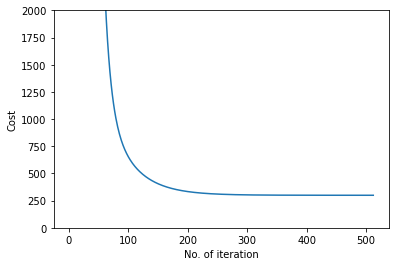

In [17]:
plt.plot(costs)
plt.xlabel("No. of iteration")
plt.ylabel("Cost")
plt.ylim(0,2000)
plt.show()

In [18]:
from IPython.display import display, HTML
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))